In [1]:
import pandas as pd
import os
import glob

# Read in the csv file containing the metering data we have on EBU3B and Atkinson Hall
building_metering = pd.read_csv(r'C:\Users\vaugh\Downloads\building_metering.csv')

# Drop unneccessary columns so that we're just left with the timestamp and total energy consumption from EBU3B
building_metering = building_metering.drop(columns = ['WARREN.CAL_IT_E2531#Real Power Mean#kW', 'WARREN.CAL_IT_E2532#Real Power Mean#kW', 'WARREN.CAL_IT_Gate_E2530#Real Power Mean#kW', 'WARREN.EBU3B_E2520#Real Power Mean#kW', 'WARREN.EBU3B_E2521#Real Power Mean#kW'])

# Convert timestamp column to datetime
building_metering['Timestamp'] = pd.to_datetime(building_metering['Timestamp'])

In [2]:
# Creating a new column to get sum of the consumption from each building
building_metering['Both Buildings total'] = building_metering['EBU3B total'] + building_metering['Atkinson total']

In [3]:
building_metering

,Timestamp,EBU3B total,Atkinson total,Both Buildings total
0,2023-01-01 00:15:00,312.613174,632.773163,945.386337
1,2023-01-01 00:30:00,313.511780,630.595501,944.107281
2,2023-01-01 00:45:00,317.042526,631.453430,948.495956
3,2023-01-01 01:00:00,318.071701,627.231457,945.303158
4,2023-01-01 01:15:00,316.035248,634.164612,950.199860
...,...,...,...,...
54521,2024-07-21 23:30:00,397.910767,670.800072,1068.710838
54522,2024-07-21 23:45:00,396.301117,667.563164,1063.864281
54523,2024-07-22 00:00:00,394.709076,666.877243,1061.586319
54524,NaT,0.000000,0.000000,0.000000


In [4]:
# Set 'Timestamp' as the index
building_metering.set_index('Timestamp', inplace=True)

# Add a new column for the day of the week
building_metering['Day of Week'] = building_metering.index.day_name()

# Group by the day of the week and calculate the mean for each day
daily_avg = building_metering.groupby('Day of Week').mean()

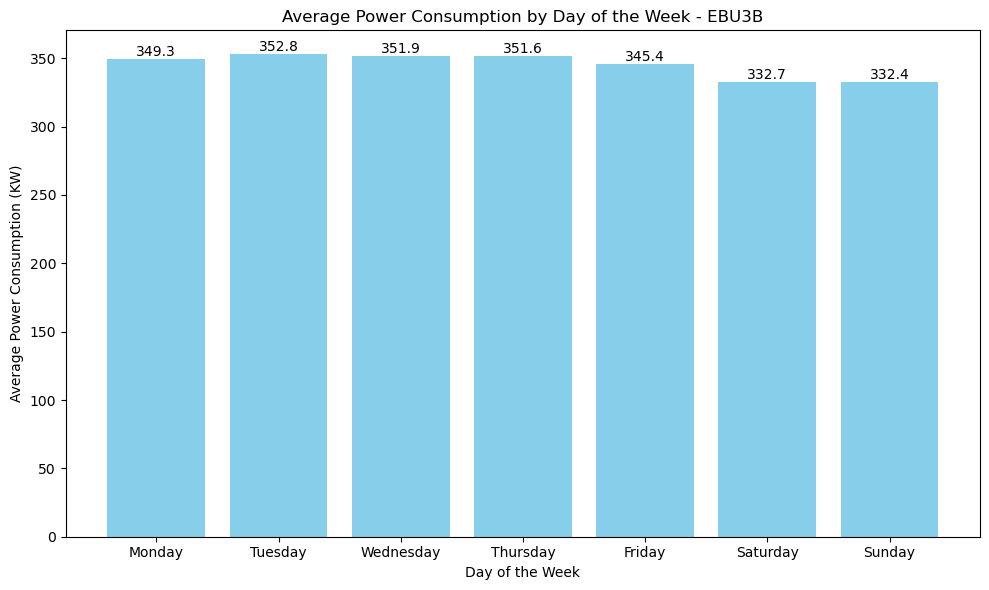

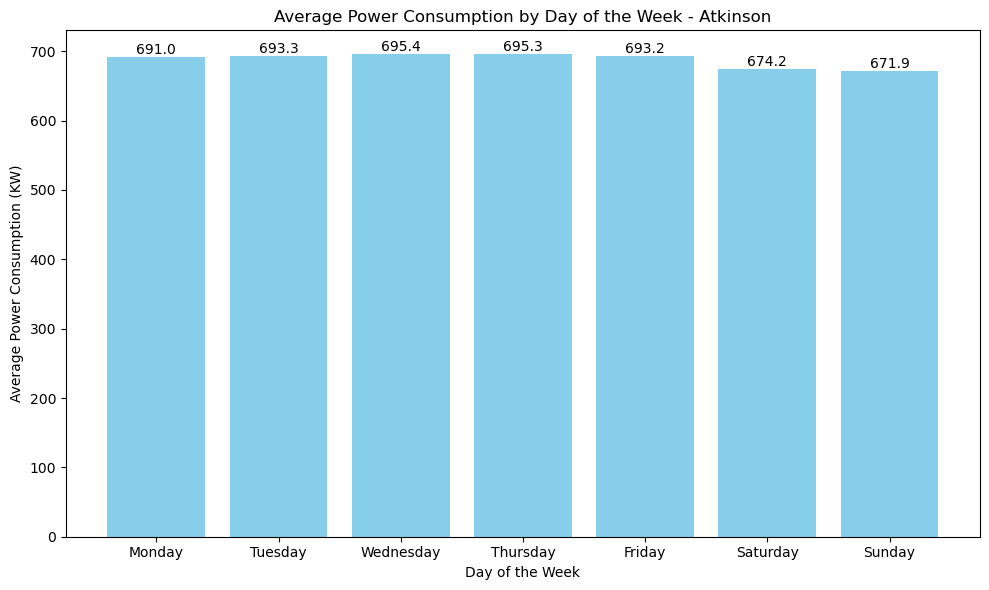

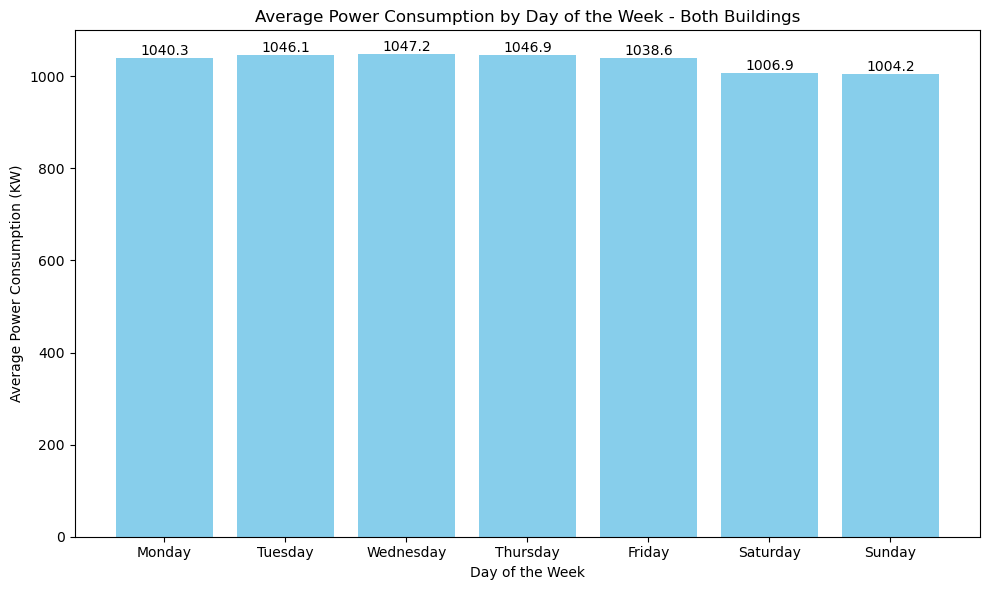

In [5]:
import matplotlib.pyplot as plt

# Define the order of days to ensure the bars appear in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the bar charts for each column
columns = ['EBU3B total', 'Atkinson total', 'Both Buildings total']
titles = ['EBU3B', 'Atkinson', 'Both Buildings']

for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(day_order, daily_avg.loc[day_order, col], color='skyblue')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Power Consumption (KW)')
    plt.title(f'Average Power Consumption by Day of the Week - {titles[i]}')
    
    # Adding the actual number values above each bar on the chart for better visual presentation
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()